In [4]:
import numpy as np
def v_dot_v(v1, v2):
    assert len(v1) == len(v2)
    total = 0
    for i in range(len(v1)):
        total += v1[i]* v2[i] 
    return total

a = np.array([100,10,1])
b = np.array([3,2,0])
v_dot_v(a, b) # should be 320


320

In [5]:
def m_dot_v(m, v):
    output = []
    for row in m:
        assert len(row) == len(v)
        output.append(v_dot_v(row, v))
    return np.array(output)

A = np.array([
    [1,0,3],
    [0,2,3],
])
x = np.array([1,10,100])
m_dot_v(A, x) # should be [301, 320]


array([301, 320])

In [6]:
def m_dot_m(m1, m2):
    output_cols = []
    for col in m2.T:
        output_cols.append(m_dot_v(m1,col))
    return np.array(output_cols).T

A = np.array([
    [1,0],
    [1,2],
    [1,3],
    [0,5],
    [100,200],
])
B = np.array([
    [1,0,10],
    [0,1,1],
])
m_dot_m(A, B)


array([[   1,    0,   10],
       [   1,    2,   12],
       [   1,    3,   13],
       [   0,    5,    5],
       [ 100,  200, 1200]])

In [7]:
!pip3 install rasterio Pillow


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.2 MB 5.1 MB/s            


In [8]:
import rasterio
land = rasterio.open("zip://../p6/land.zip!wi.tif")


<AxesSubplot:>

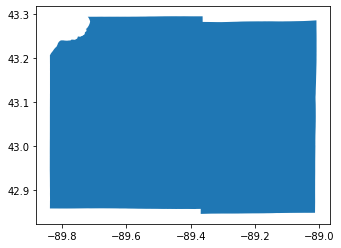

In [9]:
import geopandas as gpd
url = "????"
dane = gpd.read_file("https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Dane+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson")
dane.plot()


In [10]:
from rasterio.mask import mask
matrix, _ = mask(land, dane.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]


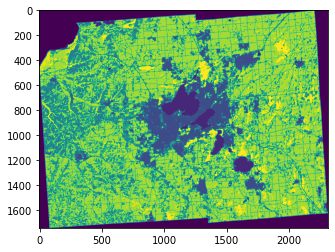

In [11]:
import matplotlib.pyplot as plt
plt.imshow(matrix)

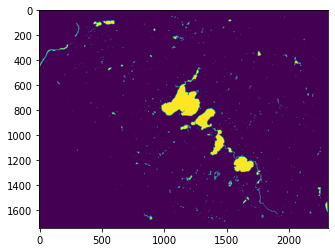

In [12]:
plt.imshow(matrix == 11)


In [13]:
import numpy as np
a = np.array([
    [0,0,5,8],
    [1,2,4,8],
    [2,4,6,9],
])


In [14]:
a % 2


array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [15]:
a % 2 == 0


array([[ True,  True, False,  True],
       [False,  True,  True,  True],
       [ True,  True,  True, False]])

In [16]:
(a % 2 == 0).astype(int)


array([[1, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0]])

In [17]:
(a % 2 == 0).astype(int).sum()


9

In [18]:
(a % 2 == 0).astype(int).mean() * 100


75.0